# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

## For Downloading the Data
link : https://www.kaggle.com/agirlcoding/all-space-missions-from-1957

### Install Package with Country Codes

In [ ]:
pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

In [ ]:
pip install jupyter nbconvert

### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation
Once you run this code, it will affect how Pandas displays floating-point numbers in DataFrames and Series. Numbers will be displayed with two decimal places and with commas as thousands separators.

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/ML/space mission analysis/mission_launches.csv')

# Preliminary Data Exploration



In [ ]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
df_data.shape

(4324, 9)

In [ ]:
df_data.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
# Dropping columns
df_data.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [ ]:
df_data.head(2)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success


In [ ]:
df_data.tail(2)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


## Descriptive Statistics

In [ ]:
df_data.describe()


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


# Number of Launches per Company

A chart that shows the number of space mission launches by organisation.

In [ ]:
df_data['Organisation'].value_counts()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


In [ ]:
launch_counts = df_data['Organisation'].value_counts()


In [ ]:
import random

In [ ]:
random_colors = ['#%06x' % random.randint(0, 0xFFFFFF) for _ in range(len(df_data))]

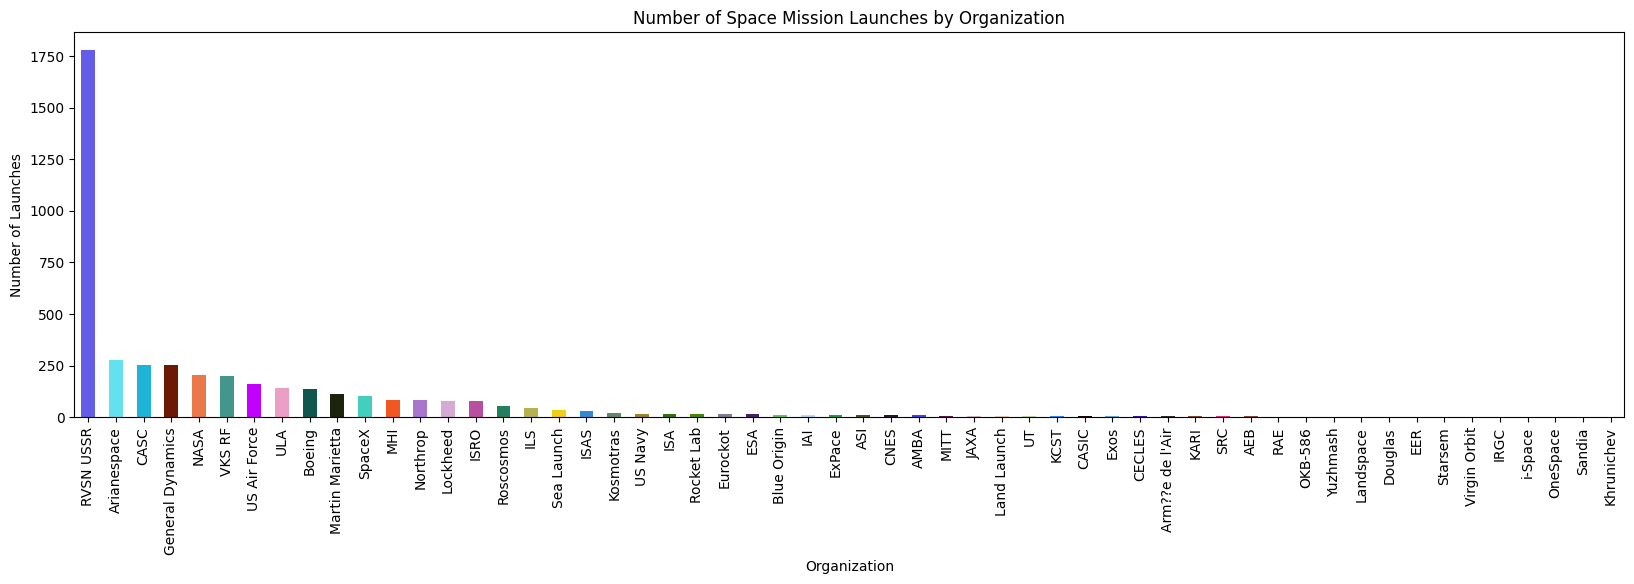

In [ ]:
plt.figure(figsize=(20,5))  # Set the figure size
launch_counts.plot(kind='bar', color=random_colors)  # Plot the bar chart
plt.title('Number of Space Mission Launches by Organization')  # Set the title
plt.xlabel('Organization')  # Set the x-axis label
plt.ylabel('Number of Launches')  # Set the y-axis label
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()  # Display the chart

In [ ]:
df_data['Country'] = df_data['Location'].str.split(', ').str[-1]
df_data.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status', 'Country'],
      dtype='object')

In [ ]:
df_data['Country'].value_counts()

Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: Country, dtype: int64

In [ ]:
country_counts = df_data['Country'].value_counts()

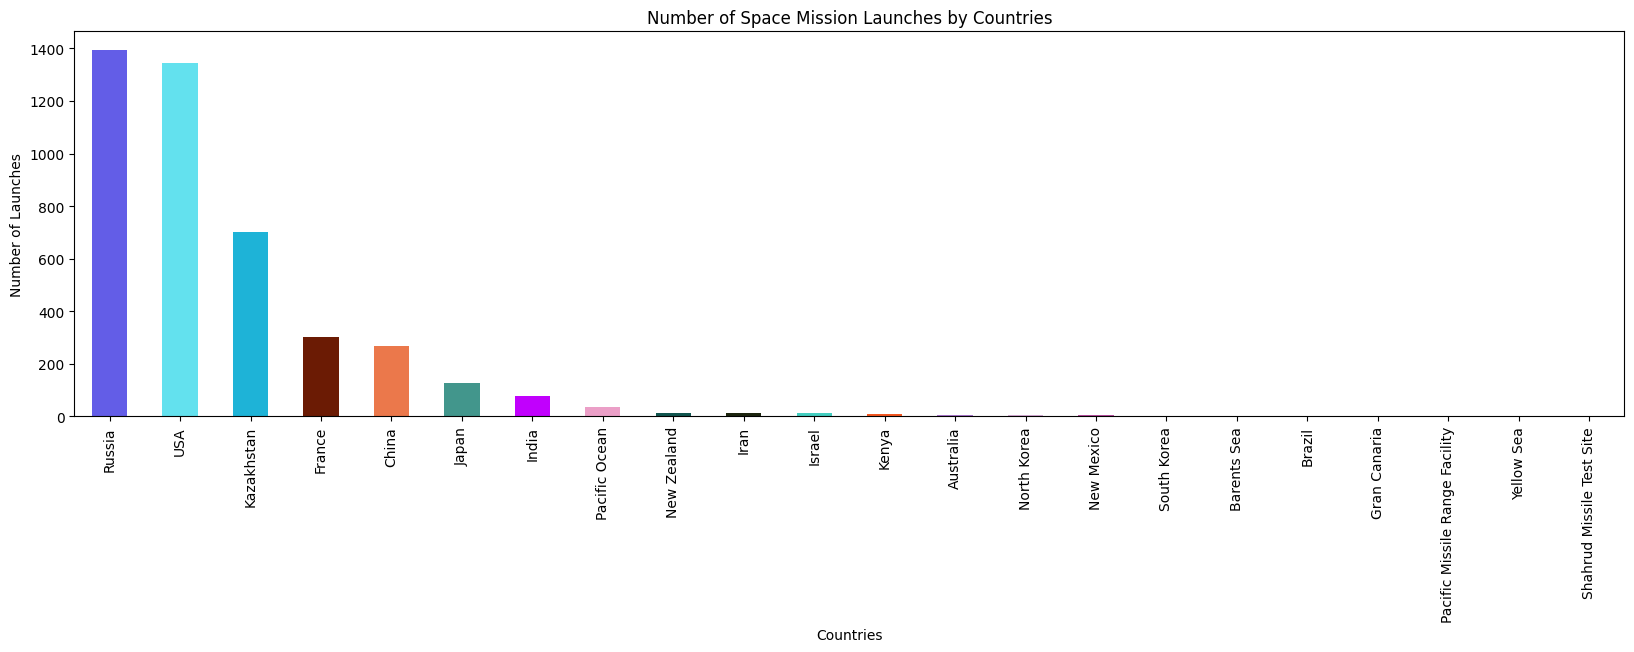

In [ ]:
plt.figure(figsize=(20,5))  # Set the figure size
country_counts.plot(kind='bar', color=random_colors)  # Plot the bar chart
plt.title('Number of Space Mission Launches by Countries')  # Set the title
plt.xlabel('Countries')  # Set the x-axis label
plt.ylabel('Number of Launches')  # Set the y-axis label
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()  # Display the chart

# Number of Active versus Retired Rockets



In [ ]:
rocket_sta = df_data["Rocket_Status"].value_counts()

In [ ]:
rocket_sta

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

In [ ]:
import plotly.express as px

# Assuming rocket_sta is your DataFrame

fig = px.pie(rocket_sta, values="Rocket_Status", names=rocket_sta.index, title="Rocket Status")
fig.show()


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
mission_status = df_data["Mission_Status"].value_counts()
mission_status

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [ ]:
fig = px.bar(mission_status, x=mission_status.index, y="Mission_Status", title="Mission Status")
fig.show()

# How Expensive are the Launches?

A histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

## Rocket Cost Distribution with Rocket Status

In [ ]:
np.sum(pd.isna(df_data.loc[:, 'Price']))

3360

In [ ]:
money= df_data.dropna(subset=['Price'], axis = "rows")
len(money)

964

In [ ]:
np.sum(pd.isna(money.loc[:,'Price']))

0

In [ ]:
money.loc[:, 'Price']

0        50.0
1       29.75
3        65.0
4       145.0
5       64.68
        ...  
3855     59.0
3971    63.23
3993    63.23
4000    63.23
4020    63.23
Name: Price, Length: 964, dtype: object

In [ ]:
money.loc[:, 'Price'] = money.loc[:,'Price'].fillna(0.0).str.replace(",","")
money.loc[:, 'Price'] = money.loc[:,'Price'].astype(np.float64).fillna(0.0)

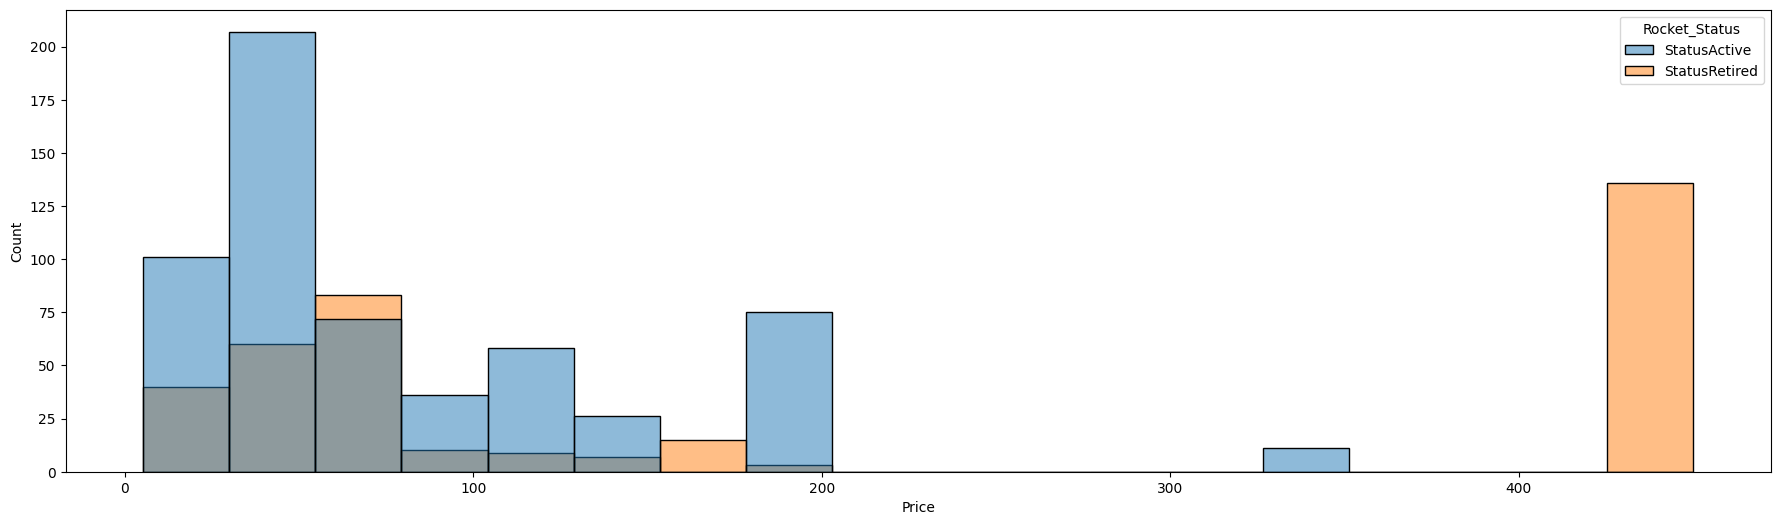

In [ ]:
money_data= money[money.loc[:, 'Price']<1000]
plt.figure(figsize = (22,6))
sns.histplot(data = money_data, x = 'Price', hue = "Rocket_Status")
plt.show()

## Rocket Cost Distribution with Mission Status

In [ ]:
np.sum(pd.isna(df_data.loc[:,"Mission_Status"]))

0

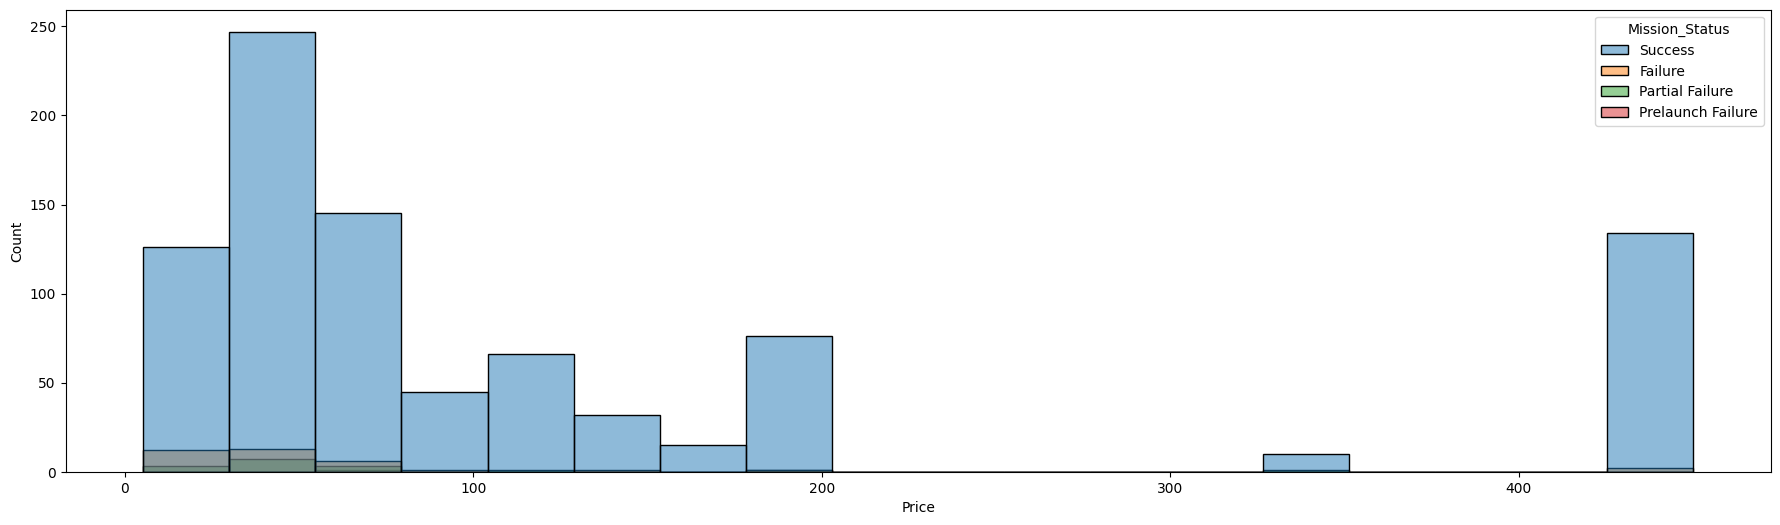

In [ ]:
plt.figure(figsize = (22,6))
sns.histplot(data = money_data, x = 'Price', hue = "Mission_Status")
plt.show()

## Countries and Mission Status

In [ ]:
encoder = LabelEncoder()
encoder.fit(df_data["Mission_Status"])
encoder

LabelEncoder()

In [ ]:
colors = {0: "red",
          1 : "Orange",
          2 : "Yellow",
          3 : "Green"}
colors

{0: 'red', 1: 'Orange', 2: 'Yellow', 3: 'Green'}

In [ ]:
countries_dict = {
    'Russia' : 'Russian Federation',
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": 'USA',
    "Barents Sea": 'Russian Federation',
    "Gran Canaria": 'USA'
}
df_data["Country"] = df_data["Location"].str.split(", ").str[-1].replace(countries_dict)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020,1970
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,1970
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,1970
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020,1970
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020,1970


In [ ]:
fig = make_subplots(rows = 4, cols = 4, subplot_titles = df_data["Country"].unique())
for i, country in enumerate(df_data["Country"].unique()):
    counts = df_data[df_data["Country"] == country]["Mission_Status"].value_counts(normalize = True)*100
    color = [colors[x] for x in encoder.transform(counts.index)]
    trace = go.Bar(x = counts.index, y = counts.values, name = country, marker = {"color" : color}, showlegend = False)
    fig.add_trace(trace, row = (i//4) + 1, col = (i%4)+1)
fig.update_layout(title = {"text":"Countries and Mission Status"}, height = 1000, width = 1100)
for i in range(1,5):
    fig.update_yaxes(title_text = "Percentage", row = i, col = 1)
fig.show()

## Use a Choropleth Map to Show the Mission Status By Countries

    Create a choropleth map using the plotly documentation
    Experiment with plotly's available colours. I quite like the sequential colour matter on this map.
    You'll need to extract a country feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

    Russia is the Russian Federation
    New Mexico should be USA
    Yellow Sea refers to China
    Shahrud Missile Test Site should be Iran
    Pacific Missile Range Facility should be USA
    Barents Sea should be Russian Federation
    Gran Canaria should be USA

You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
country_dict = dict()
for c in countries:
    country_dict[c.name] = c.alpha3
df_data["alpha3"] = df_data["Country"]
df = df_data.replace({
    "alpha3":country_dict
})
df.loc[df["Country"]== "North Korea","alpha3"] = "PRK"
df.loc[df["Country"]== "South Korea","alpha3"] = "KOR"
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,year,alpha3
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020,1970,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,1970,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,1970,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020,1970,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020,1970,USA


In [ ]:
mapdf = df.groupby(["Country","alpha3"])["Mission_Status"].count().reset_index()
mapdf.head()

,Country,alpha3,Mission_Status
0,Australia,AUS,6
1,Brazil,BRA,3
2,China,CHN,269
3,France,FRA,303
4,India,IND,76


In [ ]:
fig = px.choropleth(mapdf, locations = "alpha3", hover_name = "Country", color = "Mission_Status", title ="Status Mission by Countries")
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
import plotly.express as px

# Assuming df_data is your DataFrame with the modifications you mentioned
# (e.g., "alpha3" column for country codes, and "Mission_Status" column indicating success/failure)

# Group by country and count the number of failures
failures_by_country = df_data[df_data['Mission_Status'] == 'Failure'].groupby(['Country', 'alpha3']).size().reset_index(name='Number of Failures')

# Create a choropleth map
fig = px.choropleth(failures_by_country,
                    locations="alpha3",
                    color="Number of Failures",
                    hover_name="Country",
                    title="Number of Failures by Country",
                    color_continuous_scale=px.colors.sequential.Reds)

fig.show()


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
sun = df_data.groupby(['Country','Organisation','Mission_Status'])["Detail"].count().reset_index()
sun.head()

,Country,Organisation,Mission_Status,Detail
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1


In [ ]:
sun = sun[(sun.Country == "USA") | (sun.Country == "China") | (sun.Country == "Russian Federation") | (sun.Country == "France")]
sun.head()

,Country,Organisation,Mission_Status,Detail
9,China,CASC,Failure,14
10,China,CASC,Partial Failure,6
11,China,CASC,Success,230
12,China,CASIC,Failure,2
13,China,CASIC,Success,3


In [ ]:
fig = px.sunburst(sun, path=["Country", "Organisation", "Mission_Status"], values="Detail", title="Sunburst Chart for Countries")
fig.show()


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
money.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China


In [ ]:
df_money = money.groupby(["Organisation"])["Price"].sum().reset_index()
df_money = df_money[df_money['Price'] > 0]
df_money.head()

,Organisation,Price
0,Arianespace,"16,345.00"
1,Boeing,"1,241.00"
2,CASC,"6,340.26"
3,EER,20.00
4,ESA,37.00


In [ ]:
df_money_ = df_money.sort_values(by = ["Price"], ascending = False)[:15]
df_money_.head()

,Organisation,Price
14,NASA,"76,280.00"
0,Arianespace,"16,345.00"
21,ULA,"14,798.00"
16,RVSN USSR,"10,000.00"
2,CASC,"6,340.26"


In [ ]:
fig = px.bar(df_money_, x = "Organisation", y = "Price", title = "Total Spent Money for each Company")
fig.show()

# Chart the Number of Launches per Year

In [ ]:
import pandas as pd

# Assuming df_data is your DataFrame
# Convert the 'Date' column to datetime, coercing errors to NaT for non-convertible values
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce', utc=True)

# Filter out rows where the 'Date' is NaT (not a valid date)
df_data = df_data.dropna(subset=['Date'])

# Convert all datetime values to a specific timezone, for example, UTC
df_data['Date'] = df_data['Date'].dt.tz_convert('UTC')

# Now you can extract the year
df_data['Year'] = df_data['Date'].dt.year


In [ ]:
df_data["year"] = df_data["Date"].apply(lambda datetime: datetime.year)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020,2020


In [ ]:
ds = df_data["year"].value_counts().reset_index()
ds

,index,year
0,1971,119
1,2018,117
2,1977,114
3,1975,113
4,1976,113
...,...,...
59,2010,37
60,2005,37
61,1958,28
62,1959,20


In [ ]:
ds['random_color'] = np.random.choice(px.colors.qualitative.Set1, size=len(ds))#onlyy for producing the random colrs
fig = px.bar(ds, x = "index", y = "year", title = "Missions Number by Year",color="random_color")
fig.update_layout(showlegend=False)#to remove the side hashtags this is not neede for the random colrs
fig.show()

## Rough cost of Space missions in last 10 years (in million dollars)

In [ ]:
df_data['Year'].astype(int)
last_ten_years_df = df_data[df_data['Year']>2009]
last_ten_years_df['Organisation'].count()

739

In [ ]:
last_ten_years_df.Price.astype('float').sum() ## in dolll

45042.380000000005

In [ ]:
last_ten_years_df['Price'] = last_ten_years_df['Price'].astype(float).fillna(0)
#last_ten_years_df['Rocket'] = pd.to_numeric(last_ten_years_df['Rocket'],errors='coerce')

x = last_ten_years_df.groupby(['Year','Organisation'])['Price'].sum()
x.unstack(level=0)

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Organisation,,,,,,,,,,,
Arianespace,"1,200.00",880.00,"1,280.00",637.00,"1,037.00","1,311.00","1,274.00","1,111.00","1,074.00",874.00,497.00
Blue Origin,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,NaN
CASC,NaN,0.00,0.00,0.00,NaN,5.30,599.67,427.61,"1,023.88",769.91,520.51
CASIC,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN
ESA,NaN,NaN,37.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eurockot,41.80,NaN,NaN,NaN,NaN,NaN,41.80,41.80,41.80,NaN,NaN
ExPace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,28.30
Exos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN
IAI,0.00,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,0.00


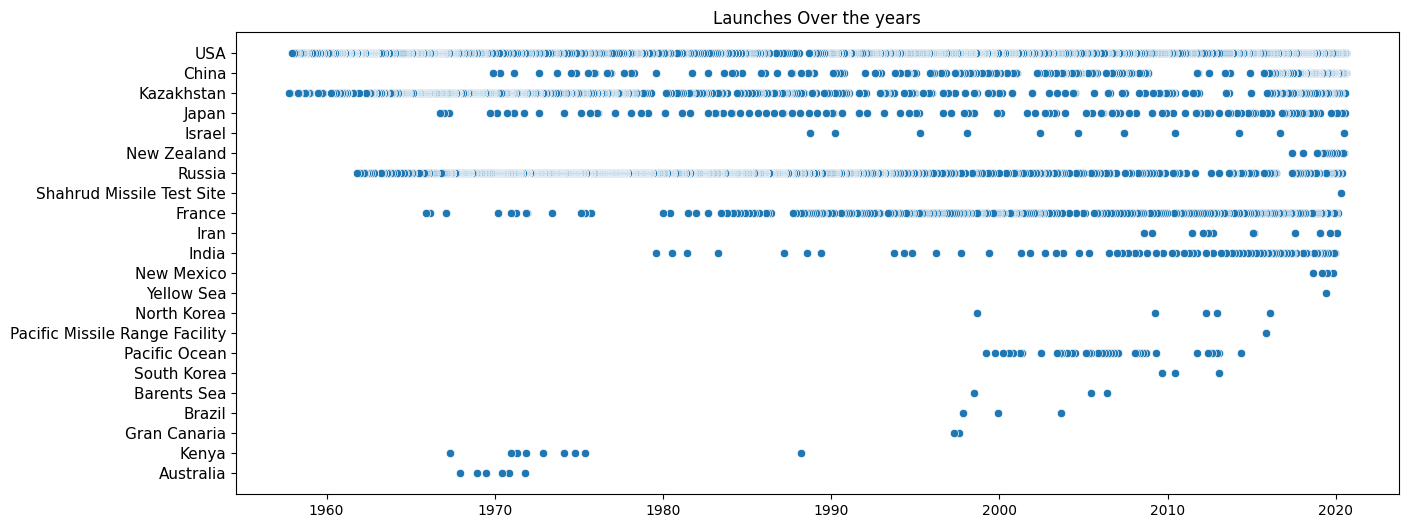

In [ ]:
plt.figure(figsize=(15,6))

sns.scatterplot(x='Date',y='Country', data=df_data)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=11);
plt.title('Launches Over the years');

## Status of Missions in last 10 years

In [ ]:
last_ten_years_df['Mission_Status'].value_counts()

Success              690
Failure               35
Partial Failure       12
Prelaunch Failure      2
Name: Mission_Status, dtype: int64

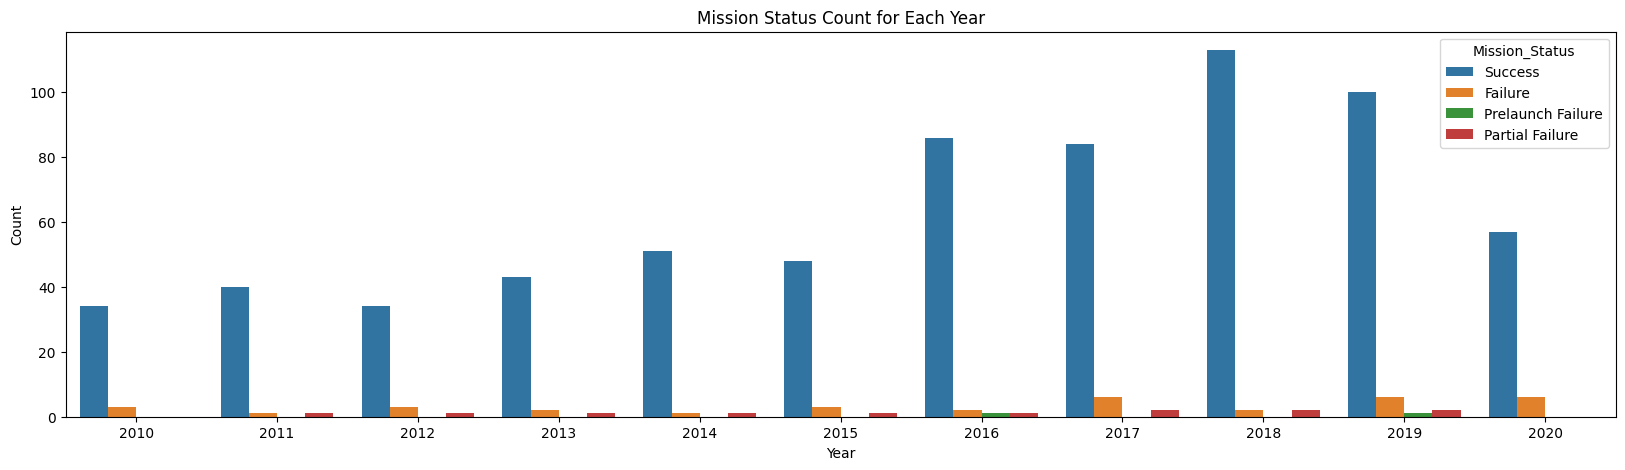

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming last_ten_years_df is your DataFrame
plt.figure(figsize=(20,5))
sns.countplot(x='Year', data=last_ten_years_df, hue='Mission_Status')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Mission Status Count for Each Year')

# Remove the log scale
# plt.yscale('log')

plt.show()


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
import pandas as pd

# Assuming space_mission_df is your DataFrame
# Convert the 'Date' column to datetime, coercing errors to NaT for non-convertible values
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce', utc=True)

# Group by month and count the number of missions
month_wise_missions = df_data.groupby(df_data['Date'].dt.strftime('%B'))['Date'].count()

# Display the result
print(month_wise_missions)


Date
April        383
August       373
December     450
February     336
January      268
July         351
June         402
March        353
May          326
November     336
October      381
September    365
Name: Date, dtype: int64


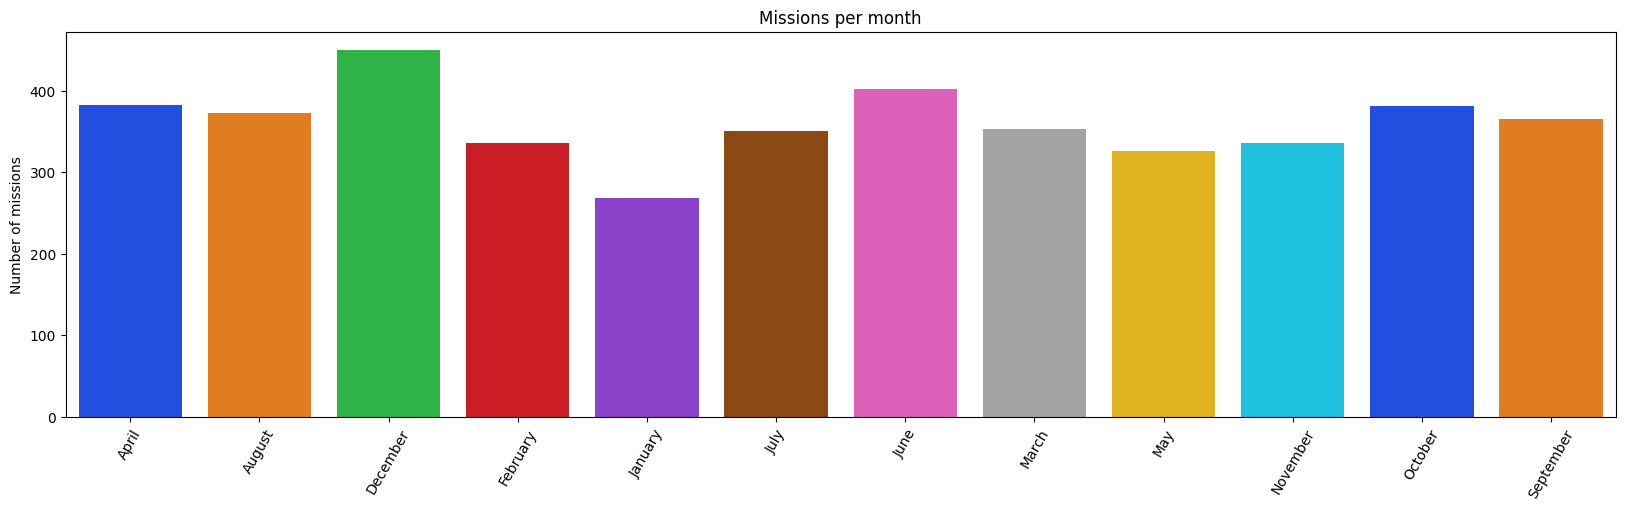

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming month_wise_missions is your Pandas Series
plt.figure(figsize=(20,5))
plt.title('Missions per month')
sns.barplot(x=pd.to_datetime(month_wise_missions.index, format='%B').month_name(), y=month_wise_missions, palette='bright')
plt.xticks(rotation=60)
plt.ylabel('Number of missions')
plt.xlabel('')
plt.show()


## Chart the Total Number of Mission Failures Year on Year.

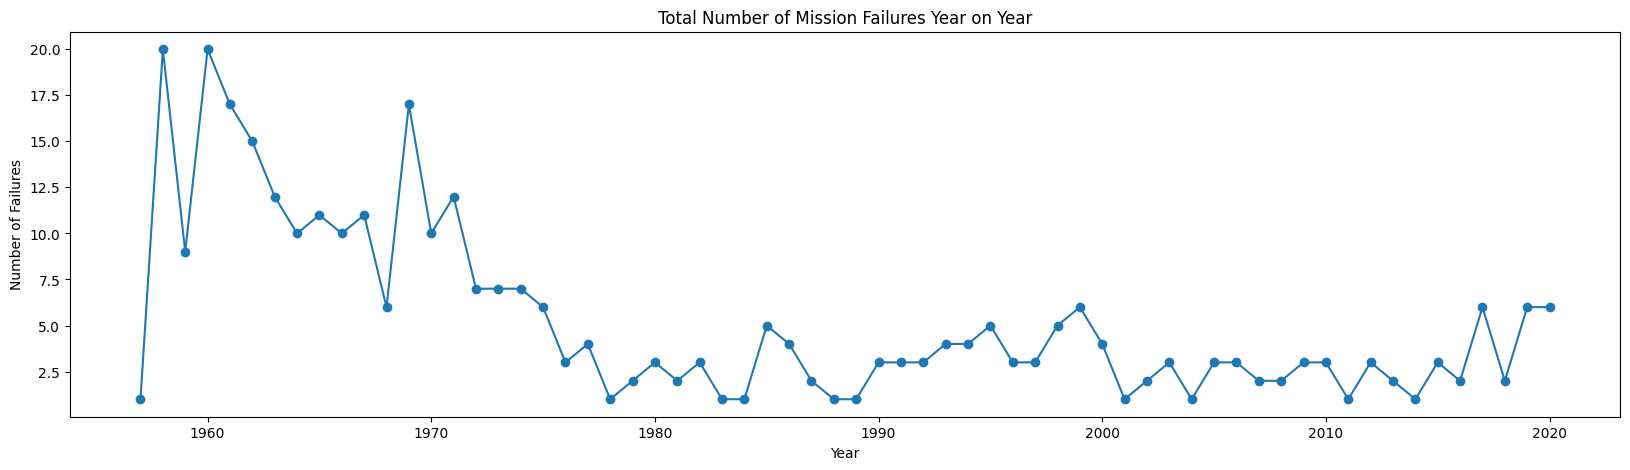

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file

# Convert the "Date" column to a datetime format
df_data['Date'] = pd.to_datetime(df_data['Date'])

# Extract the year from the "Date" column
df_data['Year'] = df_data['Date'].dt.year

# Filter the data for mission failures
failures = df_data[df_data['Mission_Status'] == 'Failure']

# Group the data by year and count the number of failures
failure_counts = failures.groupby('Year').size()

# Plot the chart
plt.figure(figsize=(20,5))
plt.plot(failure_counts.index, failure_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Failures')
plt.title('Total Number of Mission Failures Year on Year')
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

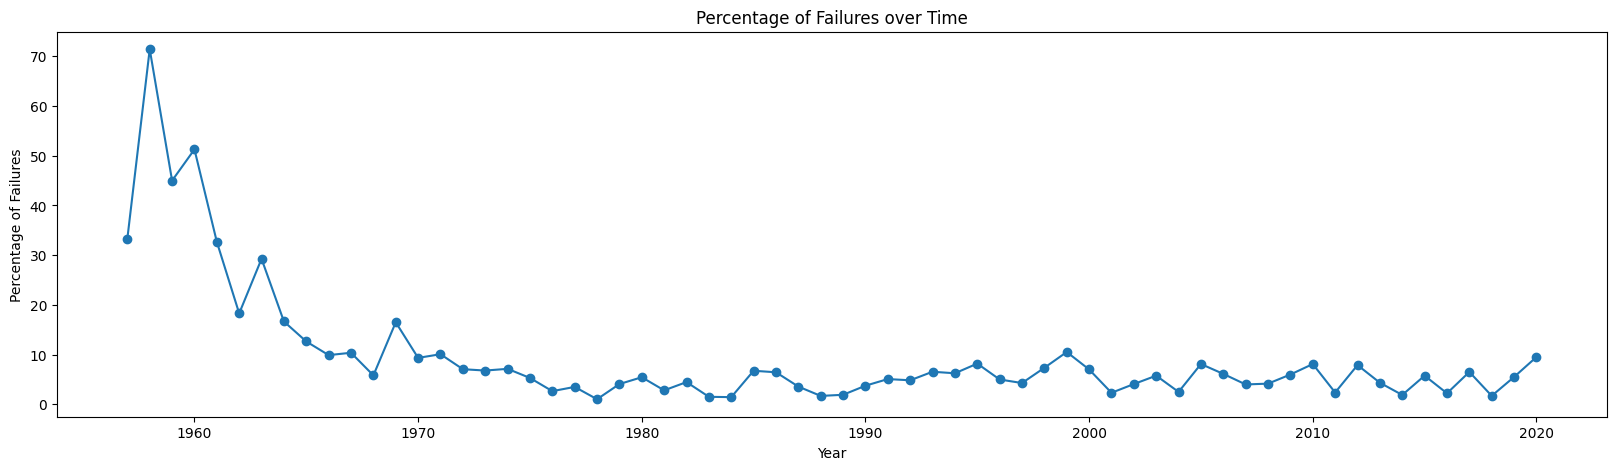

The trend of failures over time is down.
Did the countries get better at minimizing risk and improving their chances of success over time? Yes


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_data is your DataFrame
# Convert the "Date" column to a datetime format
df_data['Date'] = pd.to_datetime(df_data['Date'])

# Extract the year from the "Date" column
df_data['Year'] = df_data['Date'].dt.year

# Calculate the total number of launches and failures for each year
launch_counts = df_data.groupby('Year').size()
failure_counts = df_data[df_data['Mission_Status'] == 'Failure'].groupby('Year').size()

# Calculate the percentage of failures for each year
failure_percentage = (failure_counts / launch_counts) * 100

# Plot the chart
plt.figure(figsize=(20,5))

plt.plot(failure_percentage.index, failure_percentage.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Percentage of Failures')
plt.title('Percentage of Failures over Time')
plt.show()

# Determine the trend of failures over time
trend = 'up' if failure_percentage.iloc[-1] > failure_percentage.iloc[0] else 'down'
print(f"The trend of failures over time is {trend}.")

# Analyze the improvement over time
improvement = "Yes" if trend == 'down' else "No"
print(f"Did the countries get better at minimizing risk and improving their chances of success over time? {improvement}")


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:
import pandas as pd

# Assuming df_data is your DataFrame
# Convert the "Date" column to a datetime format
df_data['Date'] = pd.to_datetime(df_data['Date'])

# Extract the year from the "Date" column
df_data['Year'] = df_data['Date'].dt.year

# Count the total number of launches and successful launches for each year and country
total_launches = df_data.groupby(['Year', 'Country']).size().reset_index(name='Total Launches')
successful_launches = df_data[df_data['Mission_Status'] == 'Success'].groupby(['Year', 'Country']).size().reset_index(name='Successful Launches')

# Find the country in the lead for each year based on total launches
leading_countries_total = total_launches.loc[total_launches.groupby('Year')['Total Launches'].idxmax()]

# Find the country in the lead for each year based on successful launches
leading_countries_successful = successful_launches.loc[successful_launches.groupby('Year')['Successful Launches'].idxmax()]

# Display the results
print("Country in the Lead for Total Launches Each Year:")
print(leading_countries_total)

print("\nCountry in the Lead for Successful Launches Each Year:")
print(leading_countries_successful)


Country in the Lead for Total Launches Each Year:
     Year     Country  Total Launches
0    1957  Kazakhstan               2
3    1958         USA              23
5    1959         USA              16
7    1960         USA              30
10   1961         USA              43
..    ...         ...             ...
396  2016         USA              27
405  2017         USA              30
406  2018       China              39
415  2019       China              33
426  2020       China              22

[64 rows x 3 columns]

Country in the Lead for Successful Launches Each Year:
     Year     Country  Successful Launches
0    1957  Kazakhstan                    2
2    1958         USA                    5
4    1959         USA                    6
6    1960         USA                   16
8    1961         USA                   27
..    ...         ...                  ...
356  2016         USA                   26
363  2017         USA                   30
364  2018       China       

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
import pandas as pd

# Assuming df_data is your DataFrame
# Convert the "Date" column to a datetime format
df_data['Date'] = pd.to_datetime(df_data['Date'])

# Extract the year from the "Date" column
df_data['Year'] = df_data['Date'].dt.year

# Count the total number of launches and successful launches for each year and country
total_launches = df_data.groupby(['Year', 'Country']).size().reset_index(name='Total Launches')
successful_launches = df_data[df_data['Mission_Status'] == 'Success'].groupby(['Year', 'Country']).size().reset_index(name='Successful Launches')

# Find the country in the lead for each year based on total launches
leading_countries_total = total_launches.loc[total_launches.groupby('Year')['Total Launches'].idxmax()]

# Find the country in the lead for each year based on successful launches
leading_countries_successful = successful_launches.loc[successful_launches.groupby('Year')['Successful Launches'].idxmax()]

# Display the results
print("Country in the Lead for Total Launches Each Year:")
print(leading_countries_total)

print("\nCountry in the Lead for Successful Launches Each Year:")
print(leading_countries_successful)


Country in the Lead for Total Launches Each Year:
     Year     Country  Total Launches
0    1957  Kazakhstan               2
3    1958         USA              23
5    1959         USA              16
7    1960         USA              30
10   1961         USA              43
..    ...         ...             ...
396  2016         USA              27
405  2017         USA              30
406  2018       China              39
415  2019       China              33
426  2020       China              22

[64 rows x 3 columns]

Country in the Lead for Successful Launches Each Year:
     Year     Country  Successful Launches
0    1957  Kazakhstan                    2
2    1958         USA                    5
4    1959         USA                    6
6    1960         USA                   16
8    1961         USA                   27
..    ...         ...                  ...
356  2016         USA                   26
363  2017         USA                   30
364  2018       China       

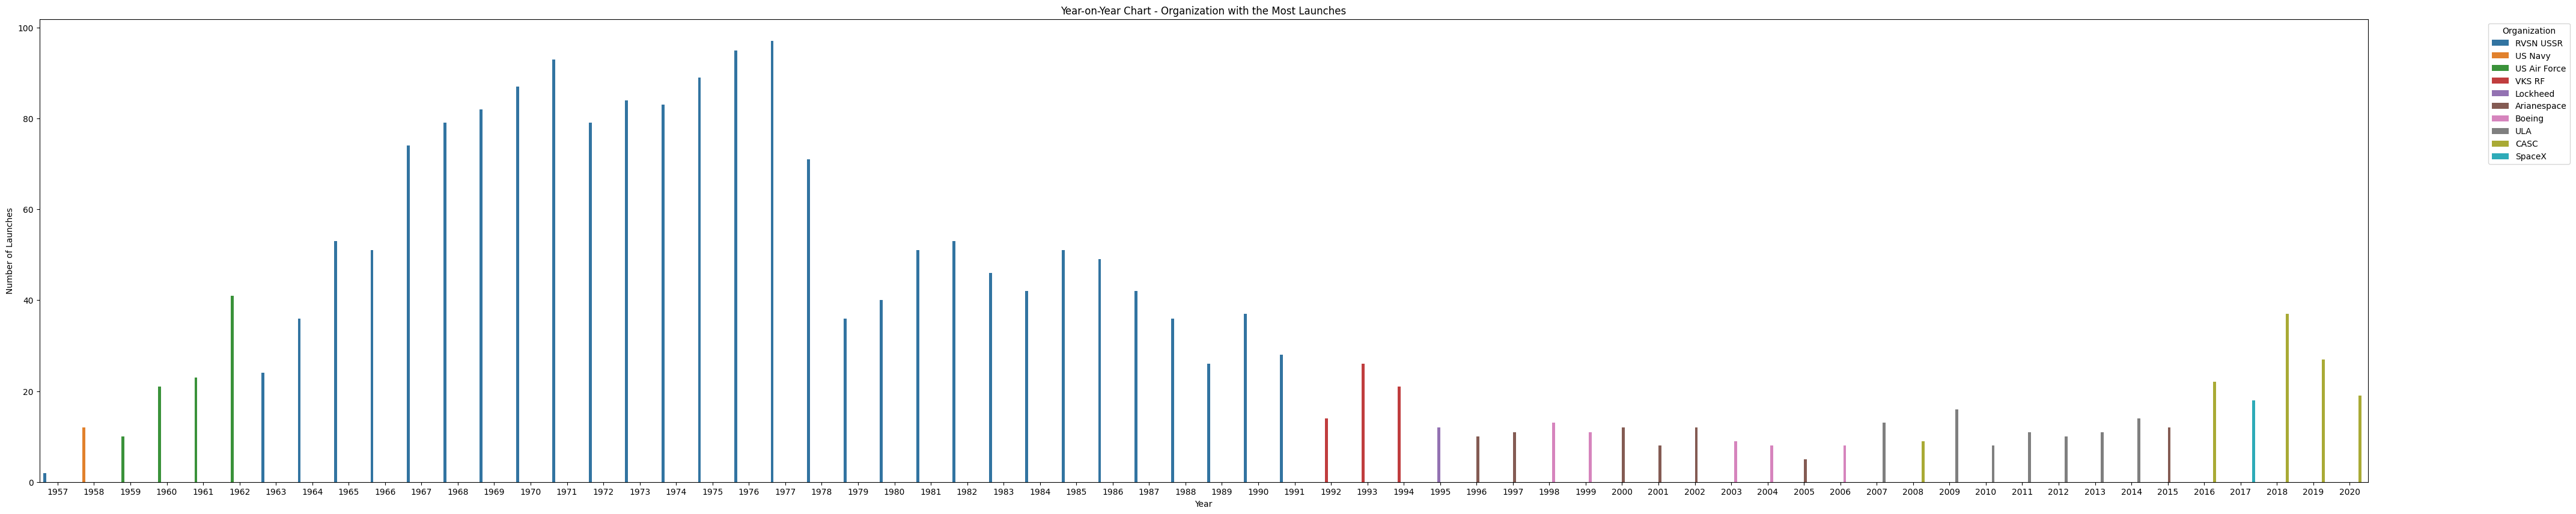

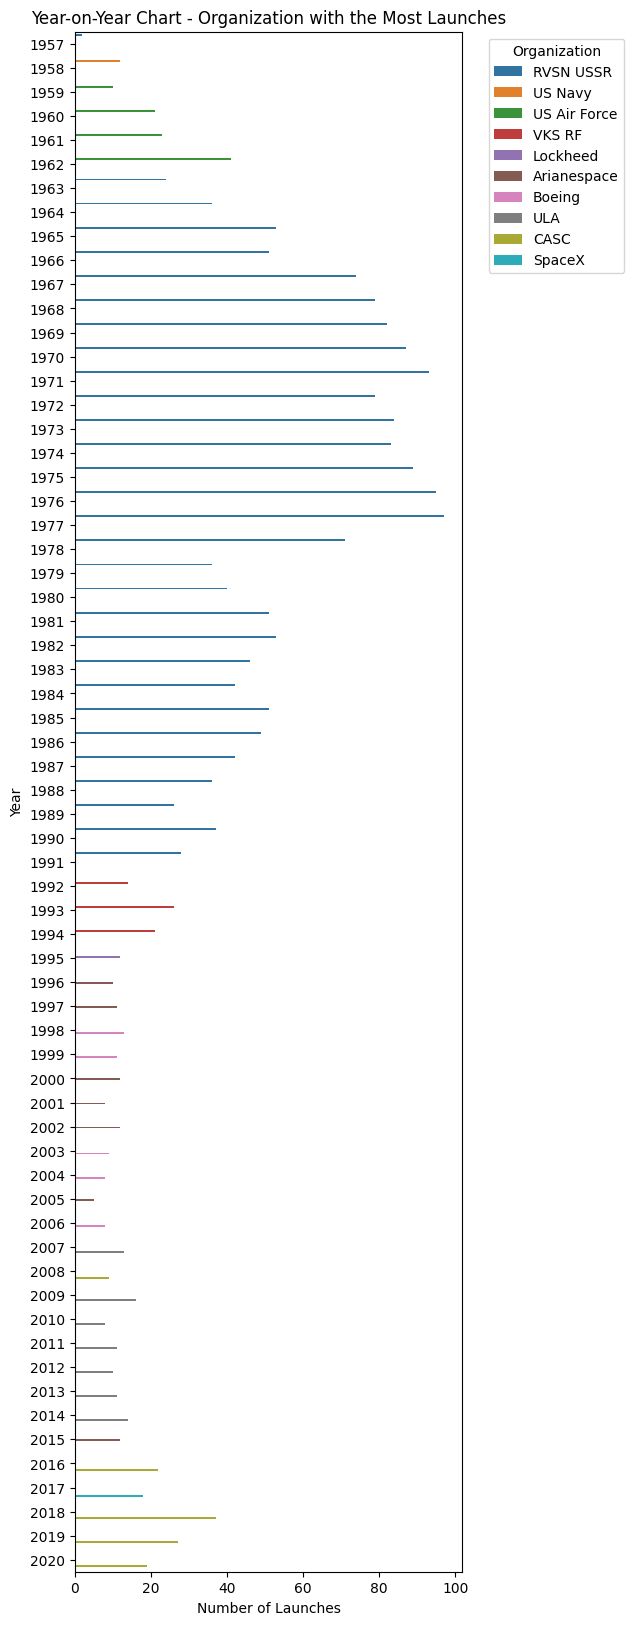

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_data is your DataFrame
# Convert the "Date" column to a datetime format
df_data['Date'] = pd.to_datetime(df_data['Date'])

# Extract the year from the "Date" column
df_data['Year'] = df_data['Date'].dt.year

# Group by Year and Organization and count the number of launches
launch_counts = df_data.groupby(['Year', 'Organisation']).size().reset_index(name='Launch Count')

# Find the organization with the most launches for each year
leading_organization = launch_counts.loc[launch_counts.groupby('Year')['Launch Count'].idxmax()]

# Plot the Year-on-Year chart
plt.figure(figsize=(50,10))
sns.barplot(x='Year', y='Launch Count', hue='Organisation', data=leading_organization)
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Year-on-Year Chart - Organization with the Most Launches')
plt.legend(title='Organization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot the Year-on-Year chart with vertical bars
plt.figure(figsize=(5, 20))
sns.barplot(x='Launch Count', y='Year', hue='Organisation', data=leading_organization, orient='h')
plt.xlabel('Number of Launches')
plt.ylabel('Year')
plt.title('Year-on-Year Chart - Organization with the Most Launches')
plt.legend(title='Organization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
